<a href="https://colab.research.google.com/github/shangeth/Google-ML-Academy/blob/master/1-Intro-to-Deep-Learning/1_4_2_MultiClass_Classification_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><a href='https://shangeth.com/google-ml-academy/'>Google ML Academy 2019</a></h1>
<h3>Instructor: <a href='https://shangeth.com/'>Shangeth Rajaa</a></h3>
<hr>

# Multi Class Classification

In the previous notebeook we used logistic regression for Binary Classification, now we will see how to train a classifier model for Multi-Class Classification.

**What is Multi-Class Classification?** 
If the target values have n discrete classification classes ie: y can take discrete value from 0 to n-1. If $y \in \{0, 1, 2, 3, ..., n-1\}$, then the classification task is n-Multi-Class.


![](https://miro.medium.com/max/972/1*SwXHlCzh-d9UqHOglp3vcA.png)

# Task - 1 

Create a 3-Multi-Class dataset with sklearn.datasets and visualize it.

It's very easy, use the same code form previous notebook and make changes for 3 classes.

In [10]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, n_features=2, centers=3, random_state=42)

X.shape, y.shape, set(y)

((300, 2), (300,), {0, 1, 2})

If you made 3 centers, you can see ```set(y)``` will return ```{0, 1, 2}```. where 0 represent the first class, 1 represent second and 2 represents the third class.

In [11]:
import numpy as np

# getting the index of each class
class_0 = np.where(y == 0)
class_1 = np.where(y == 1)
class_2 = np.where(y == 2)

X_0 = X[class_0]
X_1 = X[class_1]
X_2 = X[class_2]

X_0.shape, X_1.shape, X_2.shape

((100, 2), (100, 2), (100, 2))

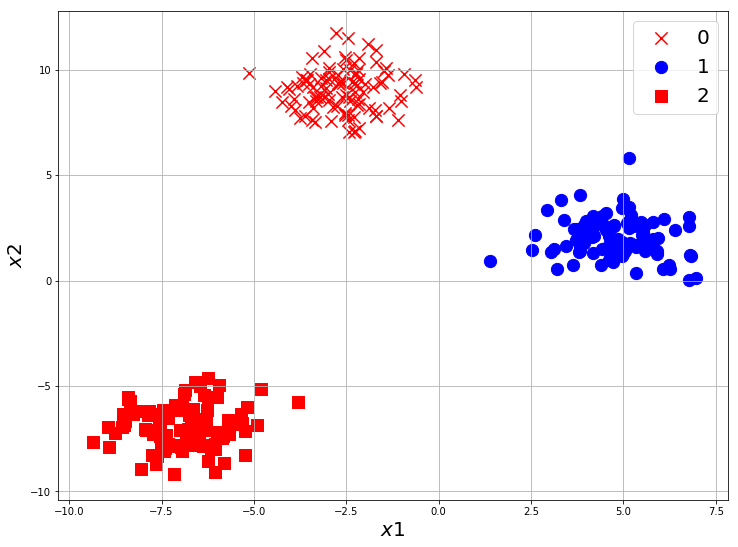

In [12]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12,9))
plt.scatter(X_0[:, 0], X_0[:, 1], marker='x', s=150, color='red', label='0')
plt.scatter(X_1[:, 0], X_1[:, 1], marker='o', s=150, color='blue', label='1')
plt.scatter(X_2[:, 0], X_2[:, 1], marker='s', s=150, color='red', label='2')
plt.xlabel('$x1$', fontsize=20)
plt.ylabel('$x2$', fontsize=20)
plt.grid(True)
plt.legend(fontsize=20)
plt.show()

# How to get the probabilities? : SoftMax

Now the target is going to be $y \in \{0, 1, 2\}$, so sigmoid cannot be used here, as sigmoid will convert any number to range 0 to 1 , so it can only be used for binary classification.

We need a function which converts the scores/logits of linear mapping into probabilities for all n classes.

That function should have some properties:

- all probabilities should be >0
- probabilities should be in range $[0,1]$
- some of all class probabilities = 1

<br>
One possible function can be class_logit/sum of all class logits. Lets try it


Example:

$logits = [-100, 40, -10]$, right now don't bother how do we get 3 logits, we will discuss it below.

$probabilities = [-100/(-100+40-10), 40/(-100+40-10), -10/(-100+40-10)]$

$probabilities = [100/70, -40/70, 10/70]$ 

you can see this example satisfies only the third property(sum=1). So we need a function which gives positive numbers. Exponential function can help us.

$Logits = [l_0, l_1, l_2, ...., l_{n-1}]$

$Probabilities = [\dfrac{e^{l_0}}{e^{l_1} + e^{l_2}+ ... + e^{l_{n-1}}}, \dfrac{e^{l_1}}{e^{l_1} + e^{l_2}+ ... + e^{l_{n-1}}}, ..., \dfrac{e^{l_{n-1}}}{e^{l_1} + e^{l_2}+ ... + e^{l_{n-1}}}]$

This function is called Softmax, and this gives the probability that a data belongs to class j, given the logits.

$P(y=j|z) = \dfrac{e^{z_j}}{\sum_{i=0}^{n-1}e^{z_i}}$

Let's code softmax function in Numpy.

In [0]:
import numpy as np

def softmax(x):
  exp = np.exp(x)
  exp_sum = exp.sum(axis=1).reshape(-1,1)
  return exp/exp_sum

In [18]:
x = np.array([[22, 40, 10]])

softmax(x)

array([[1.52299795e-08, 9.99999985e-01, 9.35762283e-14]])

Now we know, replacing sigmoid with with softmax will help in the case of multi class classification. This softmax model is also called **Softmax Regression**.

# Loss Function

As we have already seen, for classification task we will use Cross Entropy loss.
The prediction of softmax regression $\hat{y} = [0.129, 0.8, 0.071]$, whereas the true label will be one of $y \in \{0, 1, 2\}$. We cannot directly use Cross Entropy loss with $\hat{y}$ and $y$. 

So we convert the true label into One-Hot Encoding form. One hot encoding is a vector representation of the label which has '1' at the index corresponding to the label and '0' elsewhere.

Example:

Let $y \in \{0, 1, 2, 3, 4\}$, then 
- '4' is represented as $[0, 0, 0, 0, 1]$
- '3' is represented as $[0, 0, 0, 1, 0]$
- '2' is represented as $[0, 0, 1, 0, 0]$
- '1' is represented as $[0, 1, 0, 0, 0]$
- '0' is represented as $[1, 0, 0, 0, 0]$

Let's code the label to one hot conversion

In [21]:
import numpy as np

def to_one_hot(labels, num_classes):
    return np.eye(num_classes)[labels]

num_classes = 5
labels = np.array([0, 1, 2, 3, 4])

to_one_hot(labels, num_classes)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

You can also use sklearn.preprocessing.OneHotEncoder to convert labels to one hot vectors.

In [29]:
from sklearn.preprocessing import OneHotEncoder

labels = np.array([[0], 
                   [1], 
                   [2], 
                   [3], 
                   [4]])

OneHotEncoder(categories='auto').fit_transform(labels).toarray()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

Keras also have some utils functions which can help in one-hot encoding

In [33]:
from keras.utils.np_utils import to_categorical   

labels = np.array([0, 1, 2, 3, 4])
to_categorical(labels, num_classes=5)

Using TensorFlow backend.


array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

# Softmax Regression Model

From what we discussed so far, if the number of classes = 3, then we expect model to give a prediction $\hat{y} = Softmax(z)$ and $z$ will be like $z = [-10, 20, 5]$(Example).

$z = X.W + b$ will only give one number like $z=[4]$ in logistic regression. But now we are using softmax regression which expect a model which gives 3 output for a 3 class classifier. 

If the no of input features = 2 and no of out[ut classes = 3
So we will use 3 linear classifier. 

$z_1 = X.W_1 + b_1$, $z_2 = X.W_2 + b_2$, $z_3 = X.W_3 + b_3$ which can be combined together with

z = $\begin{bmatrix}z_1&z_2&z_3\\ \end{bmatrix}$ 

$ z = X . W + b $

$W = \begin{bmatrix}W_1&W_2&W_3\\ \end{bmatrix} $

$b = \begin{bmatrix}b_1&b_2&b_3\\ \end{bmatrix}$

each $W_i = \begin{bmatrix}W_{i1}\\W_{i2}\\W_{}i3\\ \end{bmatrix} $

so the final $W = \begin{bmatrix}W_{11}&W_{12}&W_{13}\\ W_{21}&W_{22}&W_{23}\\ \end{bmatrix}$

<br><hr><br>
Let $X = \begin{bmatrix}x_1&x_2\\ \end{bmatrix}$

$z = \begin{bmatrix}x_1&x_2\\ \end{bmatrix} . \begin{bmatrix}W_{11}&W_{12}&W_{13}\\ W_{21}&W_{22}&W_{23}\\ \end{bmatrix} + \begin{bmatrix}b_1&b_2&b_3\\ \end{bmatrix}$

<br>

- For 1 data, $(1,2).(2,3) + (1,3) = (1,3)$
- For n data, $(n,2).(2,3) + (1,3) = (n,3)$, b will be added to all n data, this is called broadcasting.

<br>
Frameworks like Tensorflow, PyTorch will take care of this matrix form of $W$ and $b$ for you.

# Task-2

Train a Softmax Regression with Tensorflow

In [30]:
# Data

from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, n_features=2, centers=3, random_state=42)
X.shape, y.shape, set(y)

((1000, 2), (1000,), {0, 1, 2})

We need to convert the labels into one hot vectors to train the model. Let's use keras to_categorical function

In [35]:
print(y.shape)

y = to_categorical(y, num_classes=3)
print(y.shape)

(1000,)
(1000, 3)


## Train-Validation-Test Split

So far we had a dataset and we used it for training and checked the accuracy/loss to see the performance. But its not the right way to check the preformance of a model. Usually any dataset is split into 3 parts namely Train-Validation-Test.

### train set
This dataset is used to train the model. If the training is good, metrics of this dataset will be always good. Almost 60-70% of dataset is given to training set.

### validation set
After every epoch(generally) of training, metrics of this dataset is checked to ensure, the model is also performing good on unseen data as much as it performs on the training dataset. If the model performs well on training dataset but not good on validation set, it means the model has a problem called 'Overfitting' whcih we will look in more detail later. Some hyper parameters are adjusted to make the model perform well in validation set as well during training. 10-20% of data is given to validation set.

### testing set
After the training is over for n epochs, when the model performs good in both training and validation sets, a final check is done to see the performance of the model on new unseen dataset. 20-30% of data is given to Test set.


The percentage numbers depends on the total number of data we have access to, which you will understand as you work on more projects.

We can split the dataset into train-test using ```sklearn.model_selection.train_test_split```

In [37]:
from sklearn.model_selection import train_test_split

print(X.shape, y.shape)
# test_size is the percent of split 0.2 means 20% of data is for testset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1000, 2) (1000, 3)
(800, 2) (200, 2) (800, 3) (200, 3)


## Tensorflow Model

- Make a Dataset with 2 input features, 3 output classes
- one hot encode y
- Split Dataset into Train-Validation-Test
- Train Model with Validation Dataset, check the [docs](https://keras.io/models/model/) on how to use validation data.
- predict X_test with the trained model, refer the docs(model.predict function)
- convert the prediction of X_test and y_test from one-hot to labels using np.argmax(pred, axis=1)
- use sklearn.metrics.accuracy_score on prediction of X_test and y_test to find the accuracy on Test set.


In [68]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

# Make the Dataset
num_classes = 3
num_input_features = 2
X, y = make_blobs(n_samples=2000, n_features=num_input_features, centers=num_classes, random_state=42)

# to categorical
y = to_categorical(y, num_classes=num_classes)

# train-test split
# 20% of dataset to testset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# train-validation split
# 20% of trainset to valset
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True)

# Model
model = tf.keras.Sequential([keras.layers.Dense(units=num_classes, input_shape=[num_input_features]), keras.layers.Activation('softmax')])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
tf_history = model.fit(X_train, y_train, epochs=30, verbose=True, validation_data=(X_val, y_val))

# Prediction for Test set with trained Model
from sklearn.metrics import accuracy_score
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(np.argmax(y_test_pred, axis=1), np.argmax(y_test, axis=1))

print('\nTest Accuracy = ', test_accuracy)

Train on 1280 samples, validate on 320 samples
Epoch 1/30
1280/1280 [==============================] - 0s 300us/sample - loss: 5.9285 - acc: 0.3305 - val_loss: 5.8832 - val_acc: 0.3281
Epoch 2/30
1280/1280 [==============================] - 0s 40us/sample - loss: 5.3884 - acc: 0.3305 - val_loss: 5.3271 - val_acc: 0.3281
Epoch 3/30
1280/1280 [==============================] - 0s 44us/sample - loss: 4.8527 - acc: 0.3305 - val_loss: 4.7648 - val_acc: 0.3281
Epoch 4/30
1280/1280 [==============================] - 0s 40us/sample - loss: 4.3171 - acc: 0.3305 - val_loss: 4.2103 - val_acc: 0.3281
Epoch 5/30
1280/1280 [==============================] - 0s 43us/sample - loss: 3.7869 - acc: 0.3305 - val_loss: 3.6651 - val_acc: 0.3281
Epoch 6/30
1280/1280 [==============================] - 0s 41us/sample - loss: 3.2611 - acc: 0.3305 - val_loss: 3.1202 - val_acc: 0.3281
Epoch 7/30
1280/1280 [==============================] - 0s 43us/sample - loss: 2.7437 - acc: 0.3305 - val_loss: 2.5868 - val_acc: 

Train the model with different
- no of input features
- no of output classes
- no of data
- split of train-validation-test
- epochs